In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python", "scikit-image", "scikit-learn",]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from tensorflow import keras


/usr/bin/python3
Installing: numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-contrib-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scikit-image
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scikit-learn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:
print("Размерность выборки x_train: ", x_train.shape)
print("Размерность выборки y_train: ", y_train.shape)
print("Размерность выборки x_test: ", x_test.shape)
print("Размерность выборки y_test: ", y_test.shape)

Размерность выборки x_train:  (50000, 32, 32, 3)
Размерность выборки y_train:  (50000, 1)
Размерность выборки x_test:  (10000, 32, 32, 3)
Размерность выборки y_test:  (10000, 1)


In [ ]:
y_train = y_train.ravel()
y_test  = y_test.ravel()

In [ ]:
print("Размерность выборки y_train: ", y_train.shape)
print("Размерность выборки y_test: ", y_test.shape)

Размерность выборки y_train:  (50000,)
Размерность выборки y_test:  (10000,)


In [ ]:
def show_result(x_t, y_t, y_p):
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_t[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Truth|Predict: {y_t[i]} | {y_p[i]}")

#Задание 1 Old School Image Classification
Обучить несколько моделей классификаторов( 3 вида) из sklearn на выбранных признаках,

Отобразить качество моделей на тестовой выборке

Отобразить предсказание некоторый тестовых изображений


##Гистограммы яркостей

In [ ]:
def get_brightness_histogram(X):
    histograms = []
    for image in X:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
        histograms.append(hist.ravel())
    return np.array(histograms)

In [ ]:
x_train_hist = get_brightness_histogram(x_train)
x_test_hist = get_brightness_histogram(x_test)

In [ ]:
scaler = StandardScaler() #масштабирование
x_train_hist = scaler.fit_transform(x_train_hist)
x_test_hist = scaler.transform(x_test_hist)

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hist, y_train)
y_pred = svm.predict(x_test_hist)
acc = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print("Точность гистограмм яркости: {:.2f}%".format(acc * 100))

Точность гистограмм яркости: 17.30%


##HOG (гистограмма направленных градиентов)

In [ ]:
def extract_hog_features(X):
    features = []
    for image in X:
        gray = rgb2gray(image)
         # разбиение изображенния на ячейки и вычисление градиент
        fd = hog(gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L2-Hys')
        features.append(fd)
    return np.array(features)

In [ ]:
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

In [ ]:
scaler = StandardScaler()
x_train_hog = scaler.fit_transform(x_train_hog)
x_test_hog = scaler.transform(x_test_hog)

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hog, y_train)
y_pred = svm.predict(x_test_hog)
acc = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print("Точность HOG: {:.2f}%".format(acc * 100))

Точность HOG: 41.96%


##3 модели классификаторов

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hog, y_train)
y_pred_svm = svm.predict(x_test_hog)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_hog, y_train)
y_pred_knn = knn.predict(x_test_hog)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_hog, y_train)
y_pred_rf = rf.predict(x_test_hog)

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print("Точность метода опорных векторов: {:.2f}%".format(acc_svm * 100))
print("Точность случайного леса: {:.2f}%".format(acc_rf * 100))
print("Точность n ближайшего соседа: {:.2f}%".format(acc_knn * 100))

Точность метода опорных векторов: 42.07%
Точность случайного леса: 42.83%
Точность n ближайшего соседа: 31.87%


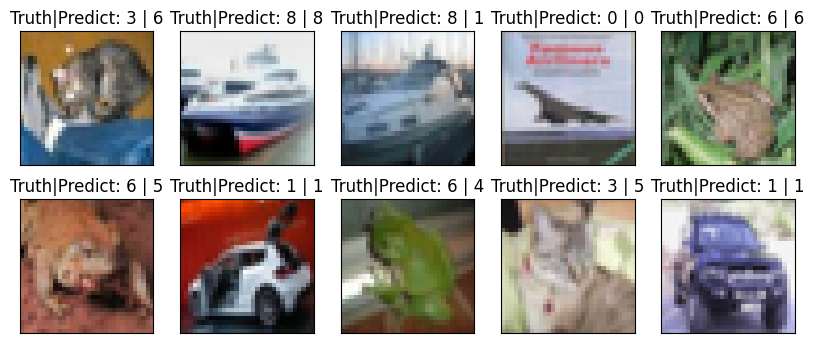

In [ ]:
show_result(x_test[:10], y_test[:10], y_pred_rf)

#Задание 2 Классификация изображений полносвязной нейронной сетью

##Работа с пикселями

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
(x_train_pixels, y_train), (x_test_pixels, y_test) = cifar10.load_data()

In [ ]:
x_train_pixels = x_train_pixels.astype('float32') / 255.0 # нормализация
x_test_pixels = x_test_pixels.astype('float32') / 255.0

In [ ]:
model_pixels = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_pixels.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_pixels = model_pixels.fit(x_train_pixels, y_train,
                    epochs=10,
                    validation_data=(x_test_pixels, y_test))

Epoch 1/10
1563/1563 [==============================] - 37s 21ms/step - loss: 1.7660 - accuracy: 0.3609 - val_loss: 1.6801 - val_accuracy: 0.3958
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6421 - accuracy: 0.4089 - val_loss: 1.5839 - val_accuracy: 0.4342
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5787 - accuracy: 0.4336 - val_loss: 1.5849 - val_accuracy: 0.4371
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5324 - accuracy: 0.4487 - val_loss: 1.5683 - val_accuracy: 0.4428
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5018 - accuracy: 0.4623 - val_loss: 1.5265 - val_accuracy: 0.4542
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4824 - accuracy: 0.4672 - val_loss: 1.4805 - val_accuracy: 0.4748
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4590 - accuracy: 0.4760 - val_loss: 1.5357 -

In [ ]:
accuracy = model_pixels.evaluate(x_test_pixels, y_test)
print("accuracy =", accuracy[1]*100)

313/313 [==============================] - 2s 6ms/step - loss: 1.4865 - accuracy: 0.4690
accuracy = 46.90000116825104


1/1 [==============================] - 0s 22ms/step
[[6.28541112e-02 2.83174291e-02 7.64144063e-02 2.74421632e-01
  8.11568946e-02 1.97241664e-01 2.01178446e-01 1.96187459e-02
  3.80256176e-02 2.07711067e-02]
 [2.43448745e-02 1.04230553e-01 2.06474285e-03 1.77352061e-03
  1.98129984e-03 5.28707227e-04 8.98045721e-04 1.09360286e-03
  4.24588829e-01 4.38495785e-01]
 [1.94411516e-01 1.36823803e-02 3.59335588e-03 1.42242294e-03
  4.14324272e-03 1.10578118e-03 2.44422059e-04 6.07820181e-03
  7.52961695e-01 2.23569497e-02]
 [4.39984769e-01 2.57391240e-02 5.48822619e-02 6.03983784e-03
  7.02474713e-02 8.69084243e-03 1.59377593e-03 3.30610126e-02
  3.29815924e-01 2.99449023e-02]
 [1.86815520e-03 4.07355023e-04 7.30554163e-02 3.11675183e-02
  4.72732812e-01 6.99995756e-02 3.36516201e-01 1.14566479e-02
  2.03992054e-03 7.56408495e-04]
 [8.25928152e-03 1.46933775e-02 4.44904529e-02 1.37243539e-01
  8.75115991e-02 5.20909578e-02 6.00076675e-01 3.57536860e-02
  2.16138968e-03 1.77189410e-02]
 [2.62

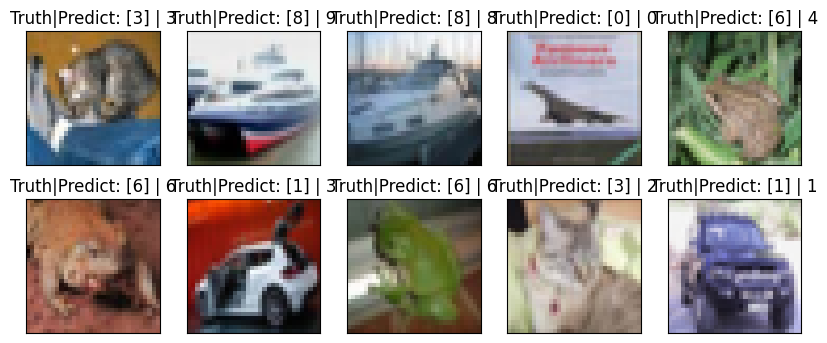

In [ ]:
y_pred = model_pixels.predict(x_test_pixels[:10])
print(y_pred)
y_pred = [i.tolist().index(max(i)) for i in y_pred]
show_result(x_test_pixels[:10], y_test[:10], y_pred)

##Работа с данными HOG

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
model_hog = Sequential([
    Dense(512, activation='relu', input_shape=(128,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model_hog.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#обучение мдели
history_hog = model_hog.fit(x_train_hog, y_train,
                    epochs=10,
                    validation_data=(x_test_hog, y_test))


Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5746 - accuracy: 0.4416 - val_loss: 1.4653 - val_accuracy: 0.4831
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3760 - accuracy: 0.5136 - val_loss: 1.4460 - val_accuracy: 0.4948
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2750 - accuracy: 0.5518 - val_loss: 1.4277 - val_accuracy: 0.5062
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1788 - accuracy: 0.5835 - val_loss: 1.4278 - val_accuracy: 0.5117
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0798 - accuracy: 0.6169 - val_loss: 1.4893 - val_accuracy: 0.5031
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9816 - accuracy: 0.6535 - val_loss: 1.5575 - val_accuracy: 0.4987
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8828 - accuracy: 0.6876 - val_loss: 1.6265 - val_ac

In [ ]:
accuracy = model_hog.evaluate(x_test_hog, y_test)
print("Точность =", accuracy[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 2.0282 - accuracy: 0.4766
Точность = 47.65999913215637


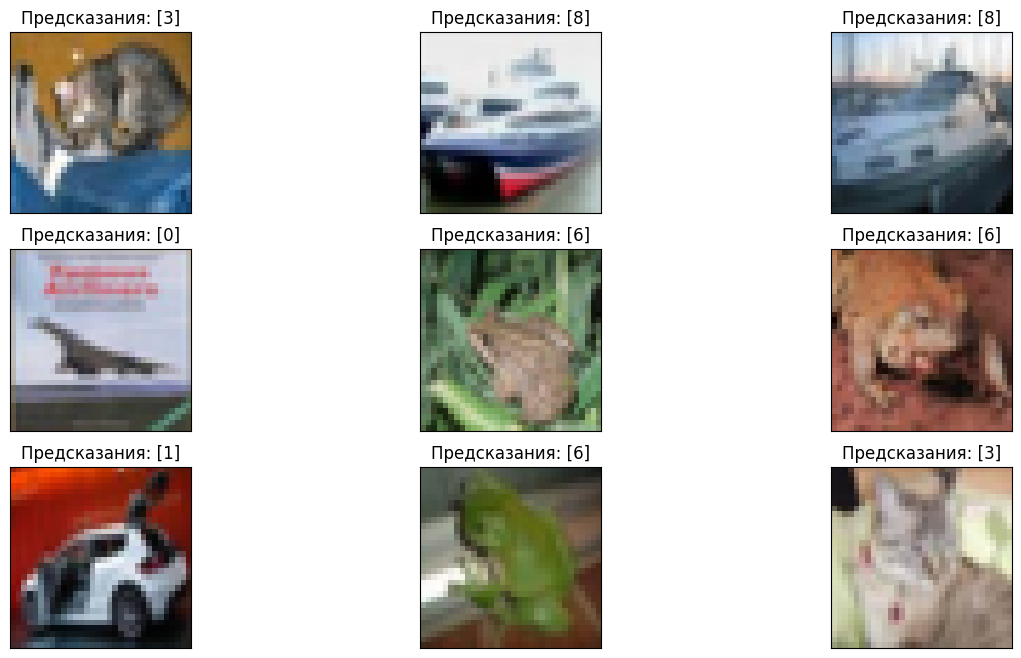

In [ ]:
# отображение предсказаний для некоторых тестовых изображений
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Предсказания: {}".format(y_test[i]))
plt.show()

# Задание 3 Классификация изображений сверточной нейросетью

In [ ]:
model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_pixels, y_train,
                    epochs=15,
                    validation_data=(x_test_pixels, y_test))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 119s 58ms/step - loss: 1.4974 - accuracy: 0.4557 - val_loss: 1.2558 - val_accuracy: 0.5466
Epoch 2/15
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1541 - accuracy: 0.5902 - val_loss: 1.1080 - val_accuracy: 0.6052
Epoch 3/15
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0022 - accuracy: 0.6485 - val_loss: 0.9800 - val_accuracy: 0.6583
Epoch 4/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8981 - accuracy: 0.6854 - val_loss: 0.9457 - val_accuracy: 0.6756
Epoch 5/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8233 - accuracy: 0.7088 - val_loss: 0.8923 - val_accuracy: 0.6892
Epoch 6/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7657 - accuracy: 0.7301 - val_loss: 0.9012 - val_accuracy: 0.6929
Epoch 7/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7076 - accuracy: 0.7495 - val_loss: 0.9099 - val_accur

In [ ]:
accuracy = model_pixels.evaluate(x_test_pixels, y_test)
print("accuracy =", accuracy[1]*100)

313/313 [==============================] - 2s 5ms/step - loss: 1.4865 - accuracy: 0.4690
accuracy = 46.90000116825104


1/1 [==============================] - 0s 39ms/step
[[6.28541112e-02 2.83174291e-02 7.64144063e-02 2.74421632e-01
  8.11568946e-02 1.97241664e-01 2.01178446e-01 1.96187459e-02
  3.80256176e-02 2.07711067e-02]
 [2.43448745e-02 1.04230553e-01 2.06474285e-03 1.77352061e-03
  1.98129984e-03 5.28707227e-04 8.98045721e-04 1.09360286e-03
  4.24588829e-01 4.38495785e-01]
 [1.94411516e-01 1.36823803e-02 3.59335588e-03 1.42242294e-03
  4.14324272e-03 1.10578118e-03 2.44422059e-04 6.07820181e-03
  7.52961695e-01 2.23569497e-02]
 [4.39984769e-01 2.57391240e-02 5.48822619e-02 6.03983784e-03
  7.02474713e-02 8.69084243e-03 1.59377593e-03 3.30610126e-02
  3.29815924e-01 2.99449023e-02]
 [1.86815520e-03 4.07355023e-04 7.30554163e-02 3.11675183e-02
  4.72732812e-01 6.99995756e-02 3.36516201e-01 1.14566479e-02
  2.03992054e-03 7.56408495e-04]
 [8.25928152e-03 1.46933775e-02 4.44904529e-02 1.37243539e-01
  8.75115991e-02 5.20909578e-02 6.00076675e-01 3.57536860e-02
  2.16138968e-03 1.77189410e-02]
 [2.62

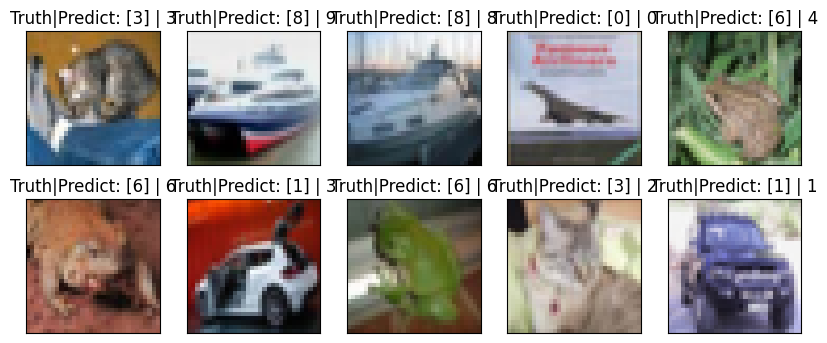

In [ ]:
y_pred = model_pixels.predict(x_test_pixels[:10])
print(y_pred)
y_pred = [i.tolist().index(max(i)) for i in y_pred]
show_result(x_test_pixels[:10], y_test[:10], y_pred)